# Lab 3: Usos más avanzados de Stable Diffusion 🧑‍🔬

Referencias:

- \[1\] [ControlNet on Diffusers](https://huggingface.co/blog/controlnet)
- \[2\] [lllyasviel/sd-controlnet-depth - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-depth)
- \[3\] [lllyasviel/sd-controlnet-canny - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-canny)
- \[4\] [lllyasviel/sd-controlnet-hed - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-hed)
- \[5\] [lllyasviel/sd-controlnet-mlsd - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-mlsd)
- \[6\] [lllyasviel/sd-controlnet-normal - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-normal)
- \[7\] [lllyasviel/sd-controlnet_openpose - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-openpose)
- \[8\] [lllyasviel/sd-controlnet_scribble - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-scribble)
- \[9\] [lllyasviel/sd-controlnet_seg - Hugging Face 🤗](https://huggingface.co/lllyasviel/sd-controlnet-seg)


### Parte 2:  Control Net

Desde que Stable Diffusion tomó el mundo, muchas personas han estado buscando maneras de tener mayor control sobre los resultados del proceso de generación. ControlNet provee una interfaz mínima permitiendo a los usuarios personalizar el proceso en gran medida. Con [ControlNet](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet), los usuarios pueden condicionar facílmente la generación con diferentes contextos espaciales como los mapas de profundidad, mapas de segmentación, dibujos y más.

Podemos convertir un dibujo animado en una foto realistica con una coherencia increible.

<table>
<tr style="text-align: center;">
    <th>Realistic Lofi Girl</th>
</tr>
<tr>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/lofi.jpg" width=300 /></td>
</tr>
</table>

O incluso usarlo como un diseñador de interiores.

<table>
<tr style="text-align: center;">
    <th>Antes</th>
    <th>Despues</th>
</tr>
<tr>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/house_depth.png" width=300/></td>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/house_after.jpeg" width=300/></td>
</tr>
</table>

Puedes convertir tus sketeches en dibujos artísticos.

<table>
<tr style="text-align: center;">
    <th>Antes</th>
    <th>Despues</th>
</tr>
<tr>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/drawing_before.png" width=300/></td>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/drawing_after.jpeg" width=300/></td>
</tr>
</table>

Incluso, hacer que logos famosos se vuelvan reales.

<table>
<tr style="text-align: center;">
    <th>Antes</th>
    <th>Despues</th>
</tr>
<tr>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/starbucks_logo.jpeg" width=300/></td>
    <td><img class="mx-auto" src="https://huggingface.co/datasets/YiYiXu/controlnet-testing/resolve/main/starbucks_after.png" width=300/></td>
</tr>
</table>

Con ControlNet, el límite es el cielo 🌠 

En este cuaderno, primero introduciremos a [`StableDiffusionControlNetPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet) y luego veremos como puede ser aplicado en varias condiciones de control.

In [1]:
!pip install -q -U transformers diffusers==0.14.0 git+https://github.com/huggingface/accelerate.git ftfy sentencepiece fpuna-stable-diffusion gradio controlnet_aux opencv-contrib-python

### 2.2.1. Canny

Para experimentar con ControlNet, 🧨 Diffusers posee [`StableDiffusionControlNetPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet), similar a
los [otros Diffusers pipelines](https://huggingface.co/docs/diffusers/api/pipelines/overview). Lo importante de [`StableDiffusionControlNetPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet) es el argumento `controlnet` que nos permite proveer un modelo particular entrenado [`ControlNetModel`](https://huggingface.co/docs/diffusers/main/en/api/models#diffusers.ControlNetModel) mientras mantenemos el mismo modelo de difusión.

Vamos a explorar distinto casos de uso de `StableDiffusionControlNetPipeline`. El primer modelo de ControlNet que vamos a ver es el [Modelo Canny](https://huggingface.co/runwayml/stable-diffusion-v1-5); este es uno de los modelos más populares que generan las increibles imágenes que ves en internet.

Usaremos la pintura famosa ["Girl With A Pearl"](https://en.wikipedia.org/wiki/Girl_with_a_Pearl_Earring) para este ejemplo. 

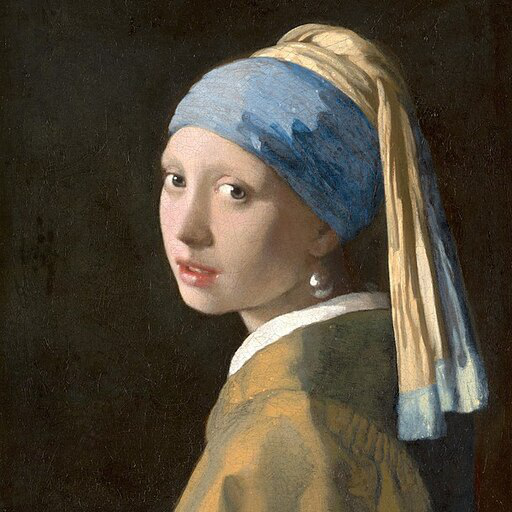

In [2]:
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)
image

Ahora preprocesaremos la imagen con Canny:

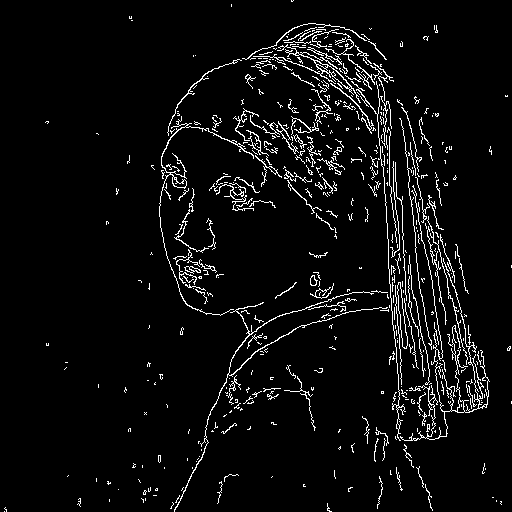

In [3]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

Como podemos ver, es esencialmente un detector de border.

Ahora, cargaremos [runwaylml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5), así como también el [Modelo ControlNet para bordes Canny](https://huggingface.co/lllyasviel/sd-controlnet-canny). Estos modelos se cargaran en mitad de precisión (`torch.dtype`) para permitir una inferencia más rápida y eficiente en memoria.

In [4]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


En vez de utilizar [PNDMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/pndm) predeterminado de Stable Diffusion, vamos a utilizar el scheduler más rápido actualmente, llamado [UniPCMultistepScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/unipc).

Elegir un scheduler mejorado puede reducir el tiempo de inferencia drásticamente; en nuestro caso, nos va a permitir reducir el número de pasos de 50 a 20 mientras mantiene más o menos la misma calidad de generación de imagen.

In [5]:
from diffusers import UniPCMultistepScheduler

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

En vez de cargar nuestro pipeline directamente a la GPU, vamos a habilitar la descarga inteligente sobre la CPU que se consigue con la [función `enable_model_cpu_offload`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/controlnet#diffusers.StableDiffusionControlNetPipeline.enable_model_cpu_offload).

Recordemos que durante la inferencia de los modelos de difusión, como Stable Diffusion, se requieren que multiple componentes se ejecuten secuencialmente.

En el caso de Stable Diffusion con ControlNet, primero usamos el codificador de texto CLIP, luego el modelo de difusión y el ControlNet, luego el decodificador de la imagen y ultimo un chequeo de seguridad para imágenes inapropiadas.

La mayoría de los componentes solo corren una vez durante el proceso de difusión y por ende, no requieren ocupar memoria de GPU todo el tiempo. Habilitando la descarga a la CPU nos aseguramos de que cada componente sea cargada solo cuando es necesaria sin reducir el tiempo de inferencia significativamente.

**Nota**: Cuando corres `enable_model_cpu_offload`, no muevas manualmente el pipeline a la GPU con `.to("cuda")` - una vez activado la función, el manejo con la GPU es automática.

In [6]:
pipe.enable_model_cpu_offload()

Ahora ya podemos correr el pipeline de ControlNet !

Aún necesitamos proveer un texto para guiar el proceso de generación de imagen, así como lo veniamos haciendo con Stable Diffusion al hacer Inpainting. La diferencia esta en que ControlNet permite un control mucho mayor sobre la imagen generada porque nos permite controlar la composición exacta de la imagen generada con los bordes que acabamos de crear.

Problemos crear imágenes donde celebridades contemporanéas posan como esta pintura del siglo 17. El cual es muy fácil de hacer con ControlNet, solo debemos incluir sus nombres en el texto!

In [7]:
prompt = ", best quality, extremely detailed"
prompt = [t + prompt for t in ["Sandra Oh", "Kim Kardashian", "rihanna", "taylor swift"]]
generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(len(prompt))]

  0%|          | 0/20 [00:00<?, ?it/s]

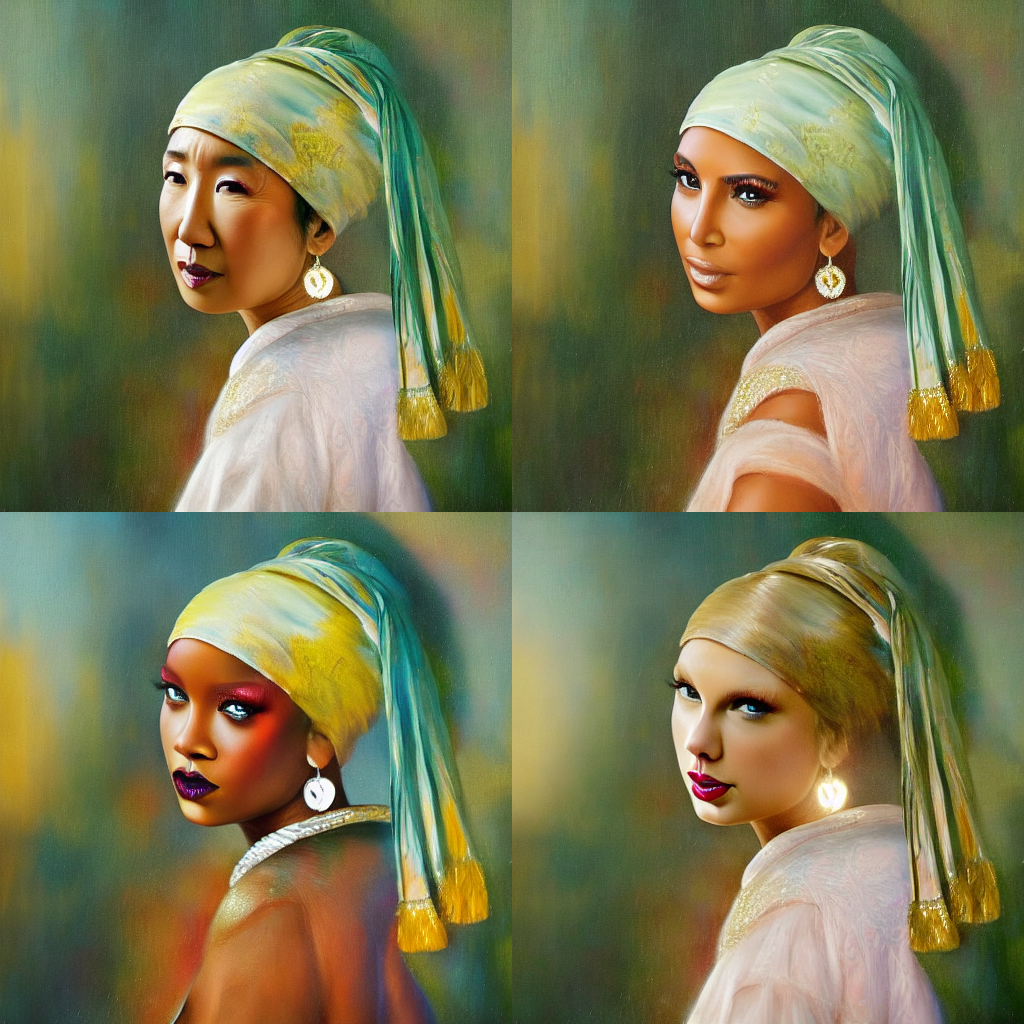

In [8]:
from fpuna_stable_diffusion.utils import image_grid

output = pipe(
    prompt,
    canny_image,
    negative_prompt=["monochrome, lowres, bad anatomy, worst quality, low quality"] * len(prompt),
    generator=generator,
    num_inference_steps=20,
)

image_grid(output.images, 2, 2)

Podemos combinar ControlNet con modelos de la comunidad también! Por ejemplo, podemos personalizar un modelo usando [DreamBooth](https://huggingface.co/docs/diffusers/main/en/training/dreambooth), y luego usar para renderizarnos en distintas escenas.

En este post, vamos a usar a nuestro amado Señor Cabeza de Papa como ejemplo para mostrar como usar ControlNet con DreamBooth

Podemos usar el mismo ControlNet, pero en vez de usar Stable Diffusion 1.5, vamos a cargar a [Mr Potato Head model](https://huggingface.co/sd-dreambooth-library/mr-potato-head) en nuestro pipeline; Mr Potato Head es un modelo de Stable Diffusion personalizado con el concepto de Señor Cara de Papa usando Dreambooth 🥔

Vamos a correr los siguientes comandos de nuevo, pero manteniendo el mismo `controlnet`!

In [9]:
model_id = "sd-dreambooth-library/mr-potato-head"
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_id,
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
#pipe.enable_xformers_memory_efficient_attention()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Hagamos al Señor Cara de Papa posar para [Johannes Vermeer](https://en.wikipedia.org/wiki/Johannes_Vermeer)!

In [10]:
generator = torch.manual_seed(2)
prompt = "a photo of sks mr potato head, best quality, extremely detailed"
output = pipe(
    prompt,
    canny_image,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    generator=generator,
    num_inference_steps=20,
)

  0%|          | 0/20 [00:00<?, ?it/s]

Podemos notar que el Señor Cara de Papa no es el mejor candidato pero que intentó todo lo posible e hizo un buen trabajo capturando parte de la esencia 🍟

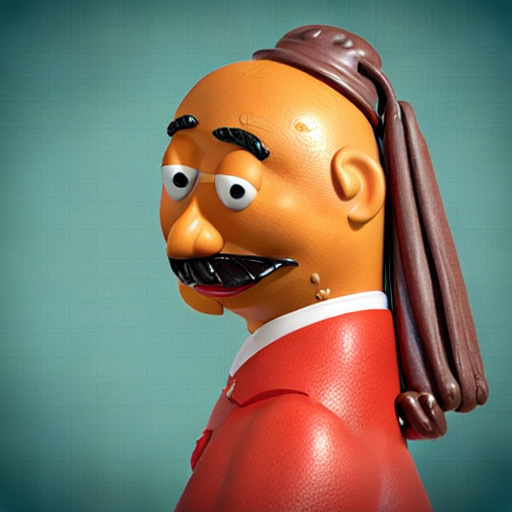

In [11]:
output.images[0]

### 2.2.2. OpenPose 

Otra aplicación exclusiva de ControlNet es que podemos tomar la pose de una foto y reusarla para generar una imagen diferente con la misma pose exacta. En este ejemplo vamos a enseñar a super-heroés como hacer yoga usando [Open Pose ControlNet](https://huggingface.co/lllyasviel/sd-controlnet-openpose)!

Primero, necesitamos algunas imágenes de personas haciendo yoga:

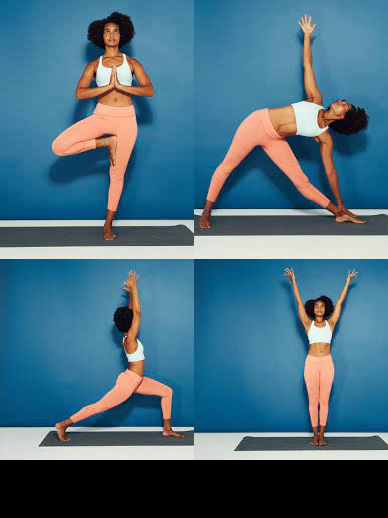

In [12]:
urls = "yoga1.jpeg", "yoga2.jpeg", "yoga3.jpeg", "yoga4.jpeg"
imgs = [
    load_image("https://hf.co/datasets/YiYiXu/controlnet-testing/resolve/main/" + url) 
    for url in urls
]

image_grid(imgs, 2, 2)

Ahora vamos a extraer las poses de yoga usando los preprocesadores de OpenPose que estan disponible via `controlnet_aux`.

cuda


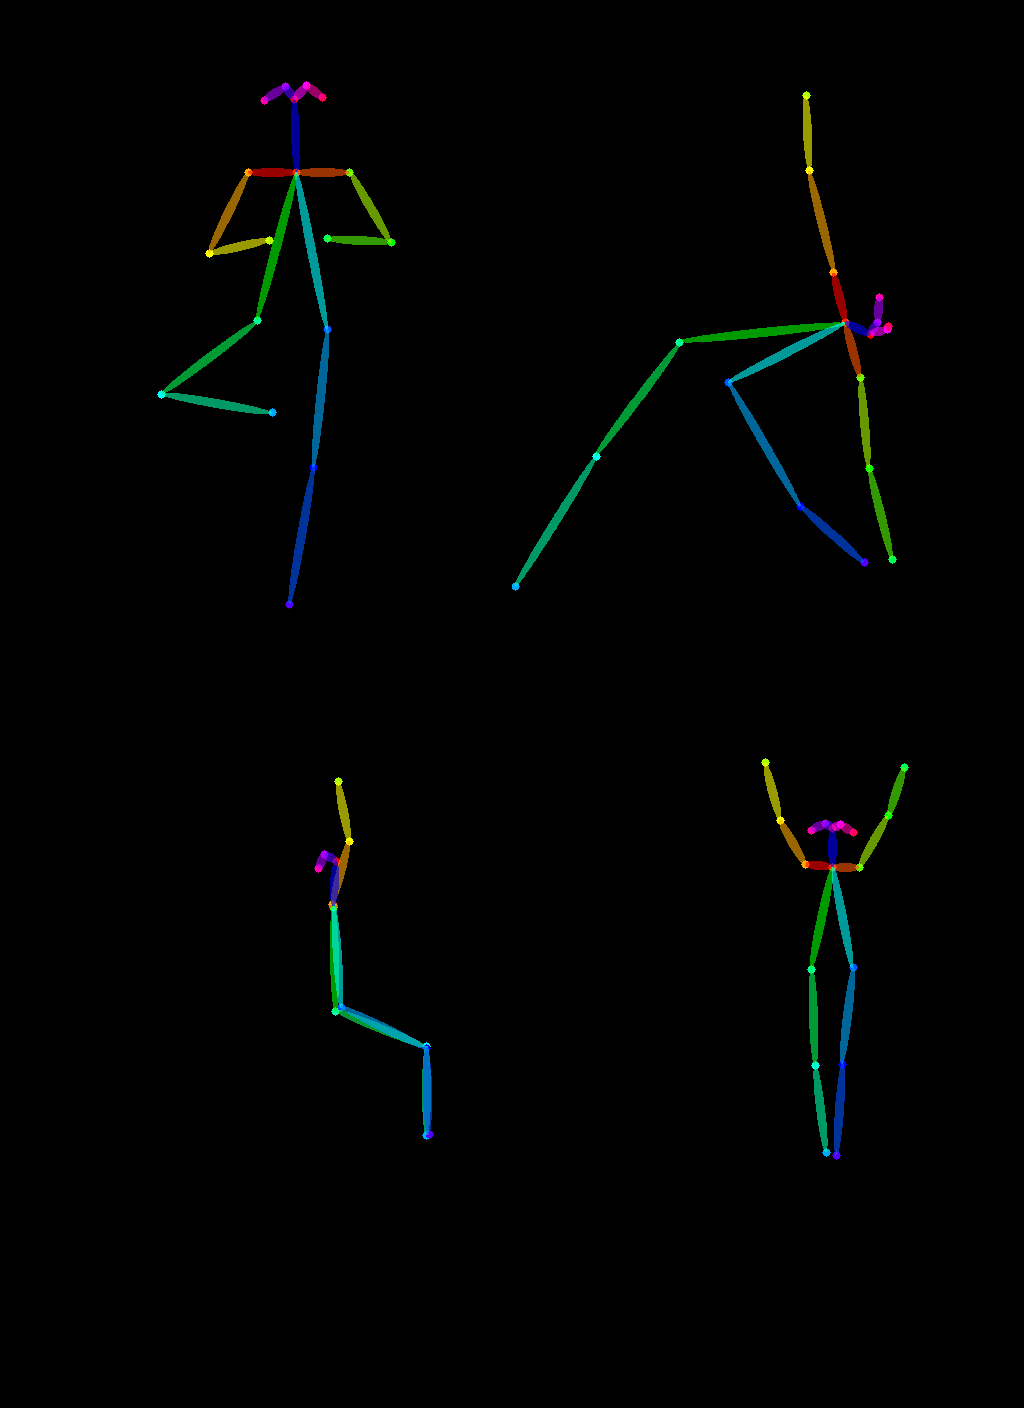

In [13]:
from controlnet_aux import OpenposeDetector

model = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

poses = [model(img) for img in imgs]
image_grid(poses, 2, 2)

Para usar estas poses de yoga al generar imágenes, necesitamos crear un [Open Pose ControlNet](https://huggingface.co/lllyasviel/sd-controlnet-openpose). Vamos a generar algunos super-heroés en las poses de arríba. Vamos 🚀

In [14]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-openpose", torch_dtype=torch.float16
)

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_id,
    controlnet=controlnet,
    torch_dtype=torch.float16,
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
#pipe.enable_xformers_memory_efficient_attention()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

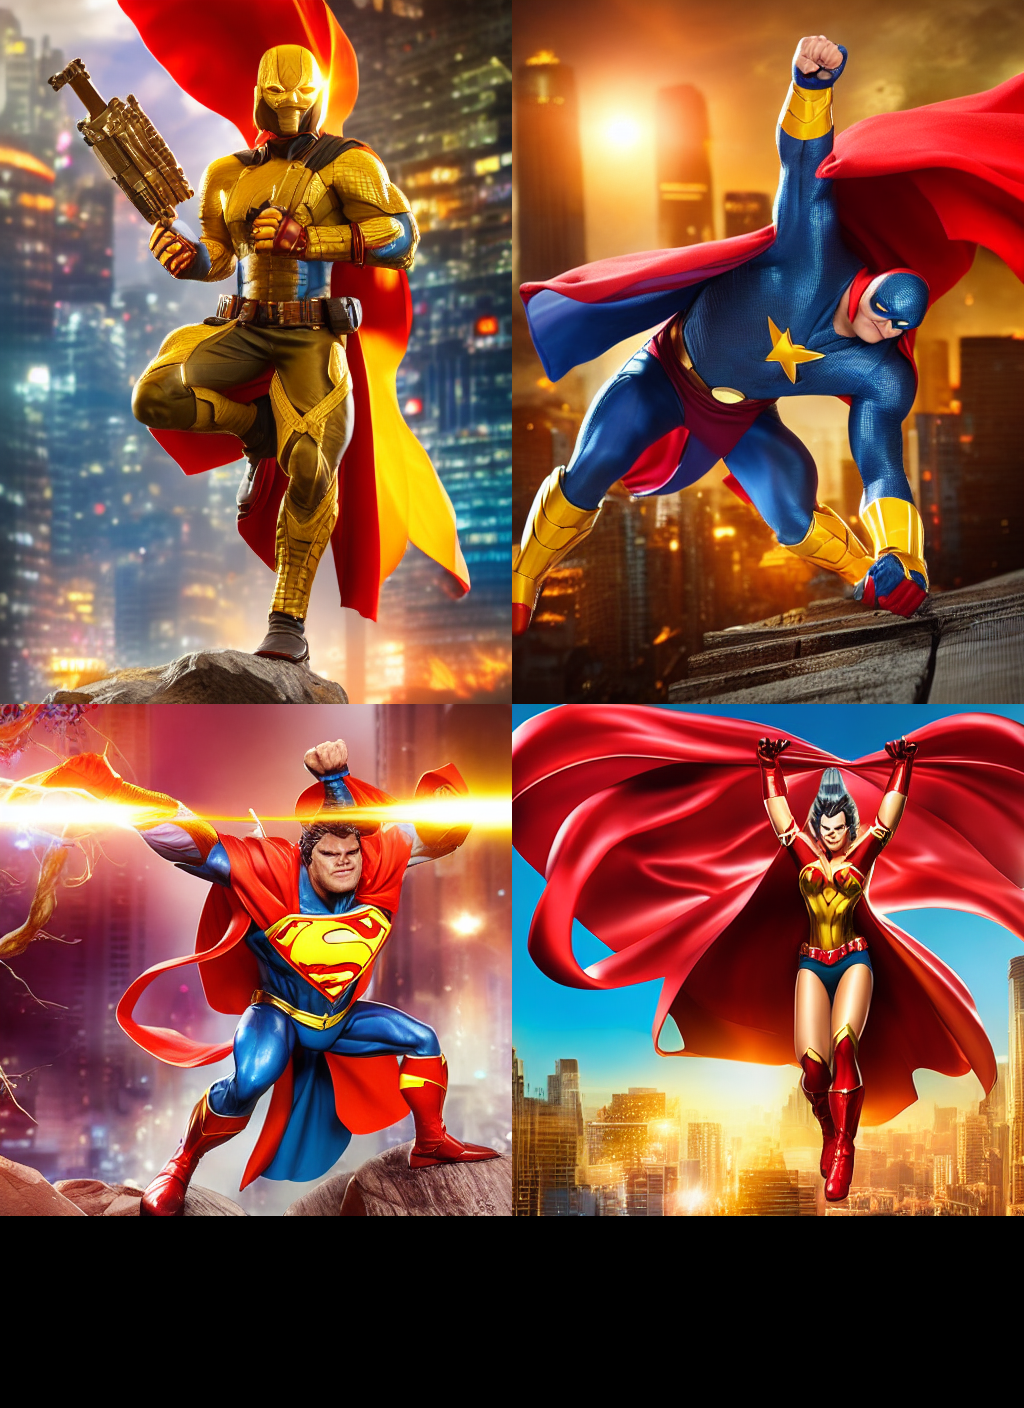

In [15]:
generator = torch.Generator(device="cpu").manual_seed(2)
prompt = "super-hero character, best quality, extremely detailed"

images = []

for i in range(4):
    output = pipe(
        prompt,
        poses[i],
        negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
        generator=generator,
        num_inference_steps=20,
    ).images[0]
    images.append(output)
    
image_grid(images, 2, 2)

### 2.2.3. Depth

Podemos también utilizar como contexto de condición a la profundidad de los objetos, tengamos en cuenta esta imagen.

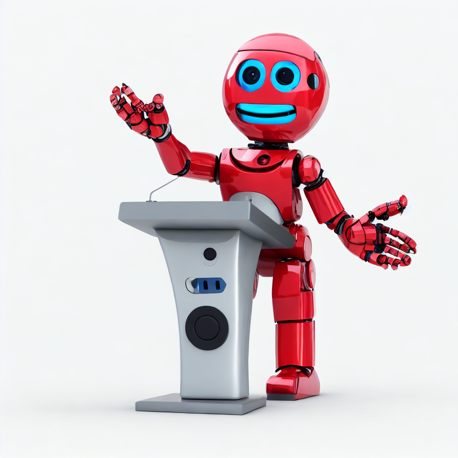

In [16]:
image = load_image("https://huggingface.co/lllyasviel/sd-controlnet-depth/resolve/main/images/stormtrooper.png")
image

Su mapa de profundidad esta dado de la siguiente manera.

No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.9/dist-packages/transformers/models/dpt/feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


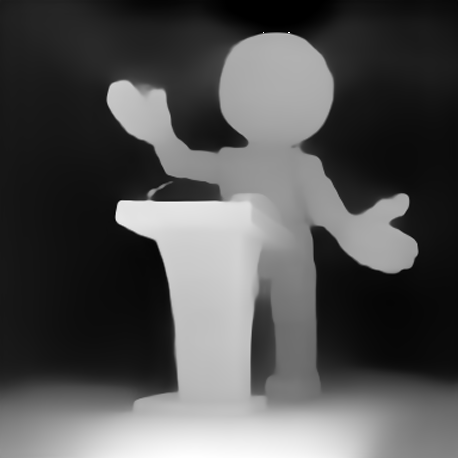

In [17]:
from transformers import pipeline

depth_estimator = pipeline('depth-estimation')

image = depth_estimator(image)['depth']
image = np.array(image)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

image

Aquí vamos a crear un ControlNet que nos permita generar una imagen con la misma profundidad que la de arriba.

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-depth", torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

pipe.enable_model_cpu_offload()

Generemos la imagen 🚀

  0%|          | 0/20 [00:00<?, ?it/s]

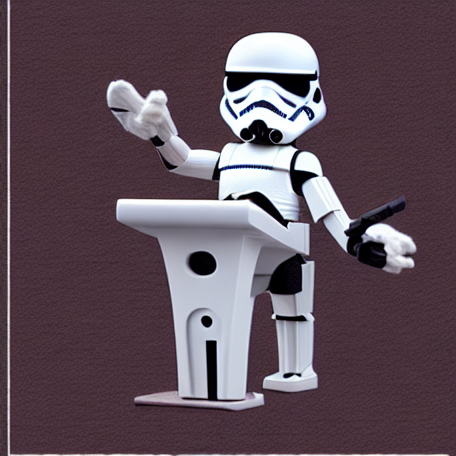

In [20]:
image = pipe("Stormtrooper's lecture", image, num_inference_steps=20).images[0]

image

### 2.2.4. Scribble

Otra forma divertida de generar imágenes, es a partir de un dibujo a mano. Como no todos sabemos dibujar, vamos a intentar generar un sketch de esta mochila.

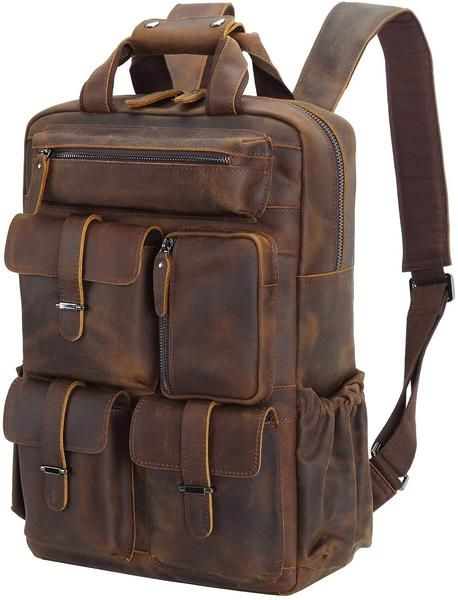

In [21]:
image = load_image("https://huggingface.co/lllyasviel/sd-controlnet-scribble/resolve/main/images/bag.png")
image

Generemos el sketch usando el modelo de HEDDetector

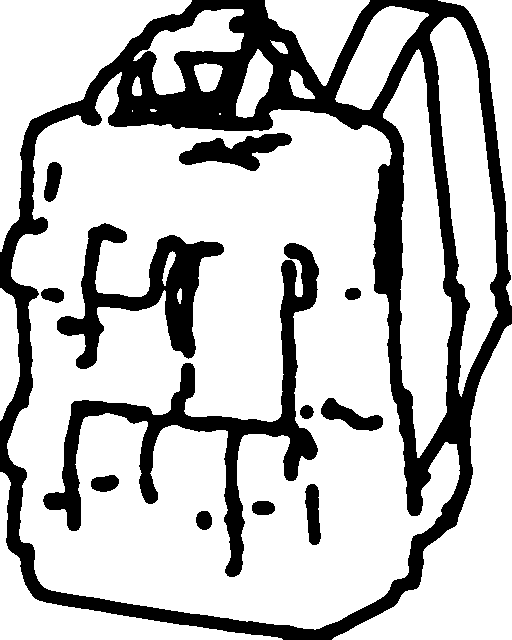

In [22]:
from controlnet_aux import HEDdetector

hed = HEDdetector.from_pretrained('lllyasviel/ControlNet')

image = hed(image, scribble=True)

Image.fromarray(255 - np.array(image))

Creamos el ControlNet que nos permita generar imágenes usando los dibujos.

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-scribble", torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
#pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()


Generemos la imagen !!

  0%|          | 0/20 [00:00<?, ?it/s]

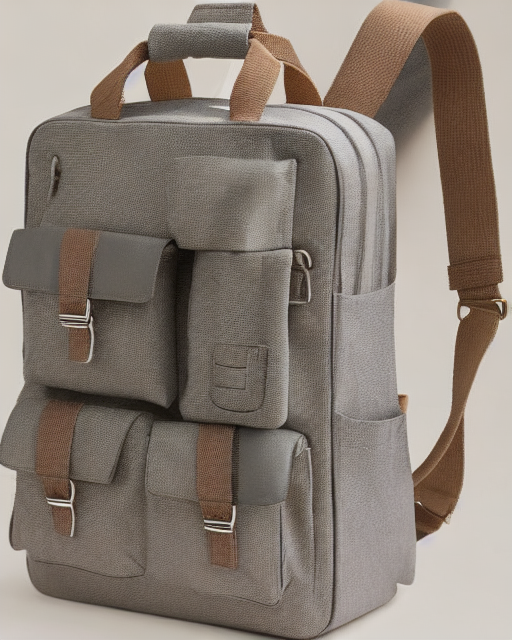

In [24]:
image = pipe("bag", image, num_inference_steps=20).images[0]

image

## Condicionamientos Soportados
Los autores lanzaron 8 modelos, cada uno entrenado sobre [Stable Diffusion v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5) 
en un tipo diferente de condicionamiento:
| Nombre de Modelo | Imagen de Control | Ejemplo de la Imagen de Control | Ejemplo de la Imagen Generada |
|---|---|---|---|
|[lllyasviel/sd-controlnet-canny](https://huggingface.co/lllyasviel/sd-controlnet-canny)<br/> *Entrenado con canny edge detection* | Una imagen monocromatica con bordes blancos sobre un fondo negro.|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_bird_canny.png"><img width="64" style="margin:0;padding:0;" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_bird_canny.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_bird_canny_1.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_bird_canny_1.png"/></a>|
|[lllyasviel/sd-controlnet-depth](https://huggingface.co/lllyasviel/sd-controlnet-depth)<br/> *Entrenado con Midas depth estimation*  |Una imagen en escala de grises con el negro representando los areas más profundos y el blanco los más cercanos.|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_vermeer_depth.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_vermeer_depth.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_vermeer_depth_2.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_vermeer_depth_2.png"/></a>|
|[lllyasviel/sd-controlnet-hed](https://huggingface.co/lllyasviel/sd-controlnet-hed)<br/> *Entrenado con HED edge detection (soft edge)*  | Una imagen monocromatica con bordes blancos suabes sobre una superficie negra.|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_bird_hed.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_bird_hed.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_bird_hed_1.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_bird_hed_1.png"/></a> |
|[lllyasviel/sd-controlnet-mlsd](https://huggingface.co/lllyasviel/sd-controlnet-mlsd)<br/> *Entrenado con M-LSD line detection*  |Una imagen monocromatica compuesta solamente de líneas rectas blancas sobre un fondo negro.|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_room_mlsd.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_room_mlsd.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_room_mlsd_0.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_room_mlsd_0.png"/></a>|
|[lllyasviel/sd-controlnet-normal](https://huggingface.co/lllyasviel/sd-controlnet-normal)<br/> *Entrenado con normal map*  |Una imagen [mapeada normal](https://en.wikipedia.org/wiki/Normal_mapping).|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_human_normal.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_human_normal.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_human_normal_1.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_human_normal_1.png"/></a>|
|[lllyasviel/sd-controlnet_openpose](https://huggingface.co/lllyasviel/sd-controlnet-openpose)<br/> *Entrenado con OpenPose bone image*  |Una imagen [OpenPose bone](https://github.com/CMU-Perceptual-Computing-Lab/openpose).|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_human_openpose.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_human_openpose.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_human_openpose_0.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_human_openpose_0.png"/></a>|
|[lllyasviel/sd-controlnet_scribble](https://huggingface.co/lllyasviel/sd-controlnet-scribble)<br/> *Entrenado con garabatos humanos*  |Una imagen monocromatica dibujada a mano con tinta blanca sobre una fondo negro.|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_vermeer_scribble.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_vermeer_scribble.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_vermeer_scribble_0.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_vermeer_scribble_0.png"/></a> |
|[lllyasviel/sd-controlnet_seg](https://huggingface.co/lllyasviel/sd-controlnet-seg)<br/>*Entrenado con Segmentación Semántica*  |Una imagen que sigue el protocolo de segmentación [ADE20K](https://groups.csail.mit.edu/vision/datasets/ADE20K/)|<a href="https://huggingface.co/takuma104/controlnet_dev/blob/main/gen_compare/control_images/converted/control_room_seg.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/control_images/converted/control_room_seg.png"/></a>|<a href="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_room_seg_1.png"><img width="64" src="https://huggingface.co/takuma104/controlnet_dev/resolve/main/gen_compare/output_images/diffusers/output_room_seg_1.png"/></a> |
